<a href="https://colab.research.google.com/github/ayeshinikulathunga/Ayeshini-DS-portfolio/blob/main/Image_Recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayeshinikulathunga","key":"0110388a446132bdf80974d382d5cefb"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [7]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped : {x_train.shape}")

Train reshaped : (60000, 28, 28, 1)


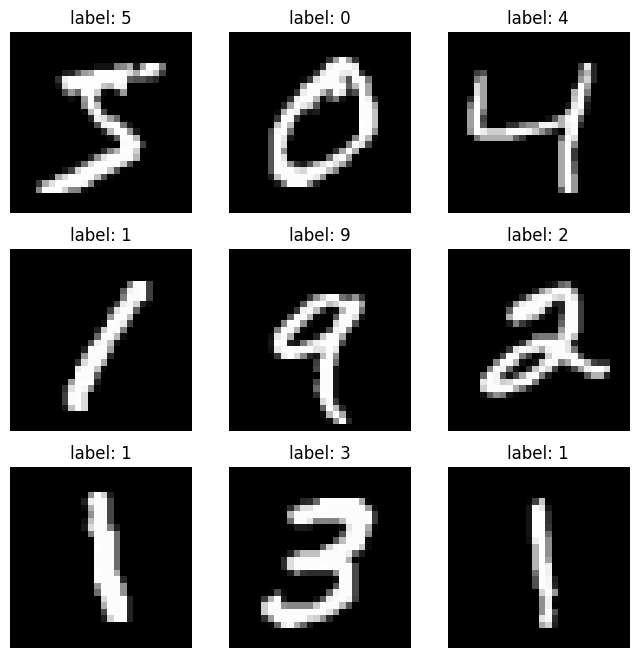

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [10]:
(x_train_c10,y_train_c10), (x_test_c10,y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape:{x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape:(50000, 32, 32, 3)


In [11]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 model = Sequential([
     Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
     MaxPooling2D((2,2)),
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D((2,2)),
     Flatten(),
     Dense(128, activation='relu'),
     Dense(10, activation='softmax')
 ])

 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.9025 - loss: 0.3276 - val_accuracy: 0.9812 - val_loss: 0.0640
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 0.9893 - val_loss: 0.0348
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9875 - val_loss: 0.0442
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9873 - val_loss: 0.0465


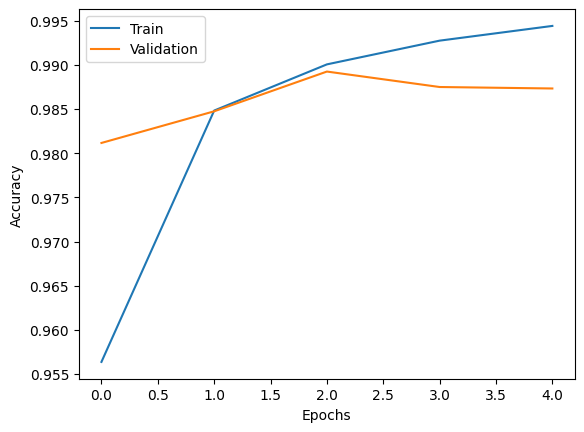

In [13]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9841 - loss: 0.0484
Test accuracy: 0.9887
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [15]:
from tensorflow.keras.layers import Dropout
model = Sequential([
     Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
     MaxPooling2D((2,2)),
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D((2,2)),
     Flatten(),
     Dense(128, activation='relu'),
     Dense(10, activation='softmax')
 ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range= 15,
    width_shift_range=0.1,
    height_shift_range= 0.1,
    horizontal_flip=True,
)

datagen.fit(x_train_c10)

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

model  = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data= (x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 84ms/step - accuracy: 0.3439 - loss: 1.7800 - val_accuracy: 0.4903 - val_loss: 1.4438
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.5290 - loss: 1.3212 - val_accuracy: 0.5928 - val_loss: 1.1397
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.5837 - loss: 1.1795 - val_accuracy: 0.6263 - val_loss: 1.0515
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.6080 - loss: 1.1131 - val_accuracy: 0.6616 - val_loss: 0.9785
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 81ms/step - accuracy: 0.6306 - loss: 1.0655 - val_accuracy: 0.6219 - val_loss: 1.1296
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.6485 - loss: 1.0155 - val_accuracy: 0.6931 - val_loss: 0.9093
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6521 - loss: 0.9999 - val_accuracy: 0.5919 - val_loss: 1.2065
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 82ms/step - accuracy: 0.6678 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1000
           1       0.83      0.87      0.85      1000
           2       0.66      0.56      0.61      1000
           3       0.59      0.43      0.50      1000
           4       0.72      0.62      0.66      1000
           5       0.77      0.50      0.61      1000
           6       0.68      0.85      0.76      1000
           7       0.70      0.80      0.75      1000
           8       0.86      0.78      0.82      1000
           9       0.64      0.91      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



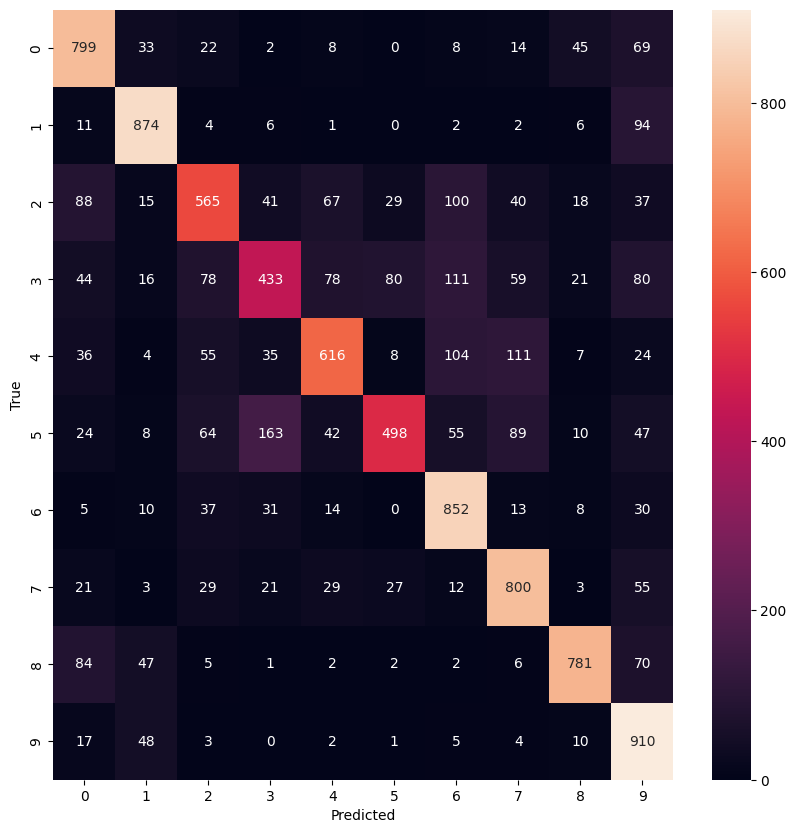

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 86% 188M/218M [00:00<00:00, 495MB/s] 
100% 218M/218M [00:00<00:00, 386MB/s]


In [20]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)
train_generator= datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator= datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.7880 - loss: 0.5478 - val_accuracy: 0.7985 - val_loss: 0.5133
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.8035 - loss: 0.4910 - val_accuracy: 0.7985 - val_loss: 0.5140
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 485s 2s/step - accuracy: 0.8021 - loss: 0.4833 - val_accuracy: 0.7985 - val_loss: 0.5112
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.8011 - loss: 0.4632 - val_accuracy: 0.7985 - val_loss: 0.5523
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 481s 2s/step - accuracy: 0.8080 - loss: 0.4405 - val_accuracy: 0.7935 - val_loss: 0.5318


In [ ]:
base_model.trainable =True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6),
              loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 2003s 8s/step - accuracy: 0.8449 - loss: 0.3316 - val_accuracy: 0.7860 - val_loss: 0.5403
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1922s 7s/step - accuracy: 0.8394 - loss: 0.3301 - val_accuracy: 0.7875 - val_loss: 0.5416
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1937s 8s/step - accuracy: 0.8338 - loss: 0.3327 - val_accuracy: 0.7880 - val_loss: 0.5433
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1831s 7s/step - accuracy: 0.8386 - loss: 0.3332 - val_accuracy: 0.7895 - val_loss: 0.5454
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1913s 8s/step - accuracy: 0.8372 - loss: 0.3304 - val_accuracy: 0.7905 - val_loss: 0.5472
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1830s 7s/step - accuracy: 0.8453 - loss: 0.3152 - val_accuracy: 0.7890 - val_loss: 0.5489
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1897s 8s/step - accuracy: 0.8463 - loss: 0.3169 - val_accuracy: 0.7900 - val_loss: 0.5509
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 1863s 7s/step - accuracy: 0.8540 - loss: 0.3101 - 

In [24]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')



63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step


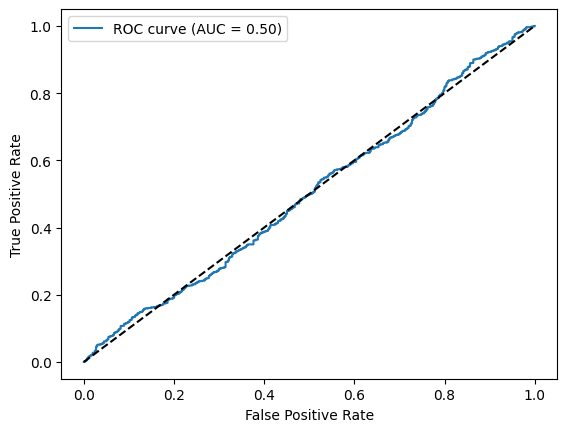

In [27]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import numpy as np

y_pred_proba = loaded_model.predict(val_generator)
fpr,tpr,_ = roc_curve(val_generator.classes,y_pred_proba)

roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [28]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'cat2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Prediction class:","Dog" if prediction[0][0] > 0.5 else "Cat")

Saving cat2.jpg to cat2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction class: Dog


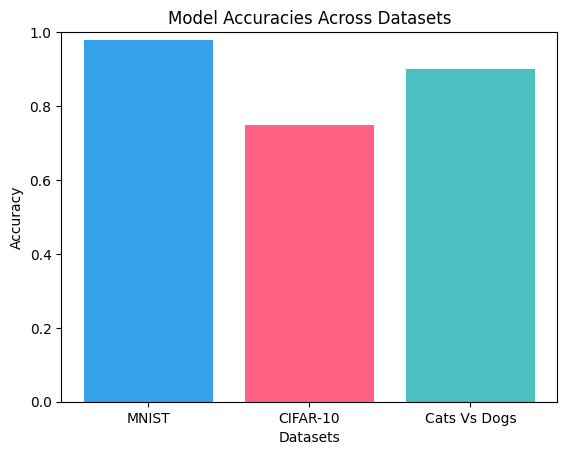

In [29]:
import matplotlib.pyplot as plt
datasets = ['MNIST','CIFAR-10','Cats Vs Dogs']
accuracies = [0.98,0.75,0.90]
plt.bar(datasets,accuracies,color=['#36A2EB','#FF6384','#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()